# Assignment 1
**Credits**: Federico Ruggeri, Eleonora Mancini, Paolo Torroni

**Keywords**: Sexism Detection, Multi-class Classification, RNNs, Transformers, Huggingface



# Contact
For any doubt, question, issue or help, you can always contact us at the following email addresses:

Teaching Assistants:

- Federico Ruggeri -> federico.ruggeri6@unibo.it
- Eleonora Mancini -> e.mancini@unibo.it

Professor:
- Paolo Torroni -> p.torroni@unibo.it

# Introduction
You are asked to address the [EXIST 2023 Task 2](https://clef2023.clef-initiative.eu/index.php?page=Pages/labs.html#EXIST) on sexism detection.

## Problem Definition

This task aims to categorize the sexist messages according to the intention of the author in one of the following categories: (i) direct sexist message, (ii) reported sexist message and (iii) judgemental message.

### Examples:

#### DIRECT
The intention was to write a message that is sexist by itself or incites to be sexist, as in:

''*A woman needs love, to fill the fridge, if a man can give this to her in return for her services (housework, cooking, etc), I don’t see what else she needs.*''

#### REPORTED
The intention is to report and share a sexist situation suffered by a woman or women in first or third person, as in:

''*Today, one of my year 1 class pupils could not believe he’d lost a race against a girl.*''

#### JUDGEMENTAL
The intention was to judge, since the tweet describes sexist situations or behaviours with the aim of condemning them.

''*As usual, the woman was the one quitting her job for the family’s welfare…*''

# [Task 1 - 1.0 points] Corpus

We have preparared a small version of EXIST dataset in our dedicated [Github repository](https://github.com/lt-nlp-lab-unibo/nlp-course-material/tree/main/2025-2026/Assignment%201/data).

Check the `A1/data` folder. It contains 3 `.json` files representing `training`, `validation` and `test` sets.


### Dataset Description
- The dataset contains tweets in both English and Spanish.
- There are labels for multiple tasks, but we are focusing on **Task 2**.
- For Task 2, labels are assigned by six annotators.
- The labels for Task 2 represent whether the tweet is non-sexist ('-') or its sexist intention ('DIRECT', 'REPORTED', 'JUDGEMENTAL').








1.   List item
2.   List item


### Example

```
    "203260": {
        "id_EXIST": "203260",
        "lang": "en",
        "tweet": "ik when mandy says “you look like a whore” i look cute as FUCK",
        "number_annotators": 6,
        "annotators": ["Annotator_473", "Annotator_474", "Annotator_475", "Annotator_476", "Annotator_477", "Annotator_27"],
        "gender_annotators": ["F", "F", "M", "M", "M", "F"],
        "age_annotators": ["18-22", "23-45", "18-22", "23-45", "46+", "46+"],
        "labels_task1": ["YES", "YES", "YES", "NO", "YES", "YES"],
        "labels_task2": ["DIRECT", "DIRECT", "REPORTED", "-", "JUDGEMENTAL", "REPORTED"],
        "labels_task3": [
          ["STEREOTYPING-DOMINANCE"],
          ["OBJECTIFICATION"],
          ["SEXUAL-VIOLENCE"],
          ["-"],
          ["STEREOTYPING-DOMINANCE", "OBJECTIFICATION"],
          ["OBJECTIFICATION"]
        ],
        "split": "TRAIN_EN"
      }
    }
```

### Instructions
1. **Download** the `A1/data` folder.
2. **Load** the three JSON files and encode them as ``pandas.DataFrame``.
3. **Aggregate labels** for Task 2 using majority voting and store them in a new dataframe column called `label`. Items without a clear majority will be removed from the dataset.
4. **Filter the DataFrame** to keep only rows where the `lang` column is `'en'`.
5. **Remove unwanted columns**: Keep only `id_EXIST`, `lang`, `tweet`, and `label`.
6. **Encode the `label` column**: Use the following mapping

```
{
    '-': 0,
    'DIRECT': 1,
    'JUDGEMENTAL': 2,
    'REPORTED': 3
}
```

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Set random seeds for reproducibility
import random
random.seed(42)
np.random.seed(42)

print("Libraries imported successfully!")

Mounted at /content/drive
Libraries imported successfully!


## Load the jason files

In [2]:
# Load the three JSON files


with open('/content/drive/MyDrive/NLP Assignment/Assignment 1/training.json', 'r', encoding='utf-8') as f:
    train_data = json.load(f)

with open('/content/drive/MyDrive/NLP Assignment/Assignment 1/validation.json', 'r', encoding='utf-8') as f:
    dev_data = json.load(f)

with open('/content/drive/MyDrive/NLP Assignment/Assignment 1/test.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

print(f"Train samples: {len(train_data)}")
print(f"Dev samples: {len(dev_data)}")
print(f"Test samples: {len(test_data)}")

Train samples: 6920
Dev samples: 726
Test samples: 312


## Convert to DataFrame

In [3]:
# Convert dictionaries to DataFrames
train_df = pd.DataFrame.from_dict(train_data, orient='index')
dev_df = pd.DataFrame.from_dict(dev_data, orient='index')
test_df = pd.DataFrame.from_dict(test_data, orient='index')

# Display sample
print("Sample from training set:")
train_df.head()

Sample from training set:


,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES
100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES
100003,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100004,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,"[Annotator_13, Annotator_14, Annotator_15, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, REPORTED, REPORTED]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [IDE...",TRAIN_ES
100005,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES


## Majority Voting Function

In [4]:
def majority_voting(labels):
    """
    Perform majority voting on labels.
    Returns the majority label, or None if there's no clear majority.
    """
    if not labels or all(label == '-' for label in labels):
        return '-'

    # Count occurrences of each label
    label_counts = Counter(labels)

    # Get the most common label and its count
    most_common = label_counts.most_common(1)[0]
    max_count = most_common[1]

    # Check if there's a clear majority (more than half)
    if max_count > len(labels) / 2:
        return most_common[0]
    else:
        # No clear majority
        return None

# Test the function
test_labels = ['DIRECT', 'DIRECT', 'REPORTED', '-', 'JUDGEMENTAL', 'REPORTED']
print(f"Test labels: {test_labels}")
print(f"Majority vote: {majority_voting(test_labels)}")

Test labels: ['DIRECT', 'DIRECT', 'REPORTED', '-', 'JUDGEMENTAL', 'REPORTED']
Majority vote: None


## Apply Majority Voting

In [5]:
# Apply majority voting to all datasets
train_df['label'] = train_df['labels_task2'].apply(majority_voting)
dev_df['label'] = dev_df['labels_task2'].apply(majority_voting)
test_df['label'] = test_df['labels_task2'].apply(majority_voting)

# Check for None values (no clear majority)
print(f"Train samples without clear majority: {train_df['label'].isna().sum()}")
print(f"Dev samples without clear majority: {dev_df['label'].isna().sum()}")
print(f"Test samples without clear majority: {test_df['label'].isna().sum()}")

# Remove samples without clear majority
train_df = train_df[train_df['label'].notna()].copy()
dev_df = dev_df[dev_df['label'].notna()].copy()
test_df = test_df[test_df['label'].notna()].copy()

print(f"\nAfter removing unclear samples:")
print(f"Train samples: {len(train_df)}")
print(f"Dev samples: {len(dev_df)}")
print(f"Test samples: {len(test_df)}")

Train samples without clear majority: 2399
Dev samples without clear majority: 259
Test samples without clear majority: 95

After removing unclear samples:
Train samples: 4521
Dev samples: 467
Test samples: 217


## Filter English Tweets Only

In [6]:
train_df = train_df[train_df['lang'] == 'en'].copy()
dev_df = dev_df[dev_df['lang'] == 'en'].copy()
test_df = test_df[test_df['lang'] == 'en'].copy()

print(f"After filtering English tweets:")
print(f"Train samples: {len(train_df)}")
print(f"Dev samples: {len(dev_df)}")
print(f"Test samples: {len(test_df)}")

After filtering English tweets:
Train samples: 2202
Dev samples: 115
Test samples: 217


## Keep Only Required Columns

In [7]:
columns_to_keep = ['id_EXIST', 'lang', 'tweet', 'label']

train_df = train_df[columns_to_keep].copy()
dev_df = dev_df[columns_to_keep].copy()
test_df = test_df[columns_to_keep].copy()

print("Columns after filtering:")
print(train_df.columns.tolist())
print("\nSample data:")
train_df.head()

Columns after filtering:
['id_EXIST', 'lang', 'tweet', 'label']

Sample data:


,id_EXIST,lang,tweet,label
200002,200002,en,Writing a uni essay in my local pub with a cof...,REPORTED
200006,200006,en,According to a customer I have plenty of time ...,REPORTED
200008,200008,en,New to the shelves this week - looking forward...,-
200010,200010,en,I guess that’s fairly normal for a Neanderthal...,-
200011,200011,en,#EverydaySexism means women usually end up in ...,JUDGEMENTAL


## Encode Labels

In [8]:

label_mapping = {
    '-': 0,
    'DIRECT': 1,
    'JUDGEMENTAL': 2,
    'REPORTED': 3
}

# Apply label encoding
train_df['label'] = train_df['label'].map(label_mapping)
dev_df['label'] = dev_df['label'].map(label_mapping)
test_df['label'] = test_df['label'].map(label_mapping)

# Check label distribution
print("Label distribution in training set:")
print(train_df['label'].value_counts().sort_index())
print("\nLabel distribution in dev set:")
print(dev_df['label'].value_counts().sort_index())
print("\nLabel distribution in test set:")
print(test_df['label'].value_counts().sort_index())

Label distribution in training set:
label
0    1733
1     336
2      42
3      91
Name: count, dtype: int64

Label distribution in dev set:
label
0    90
1    14
2     7
3     4
Name: count, dtype: int64

Label distribution in test set:
label
0    160
1     42
2      5
3     10
Name: count, dtype: int64


## Visualize Label Distribution

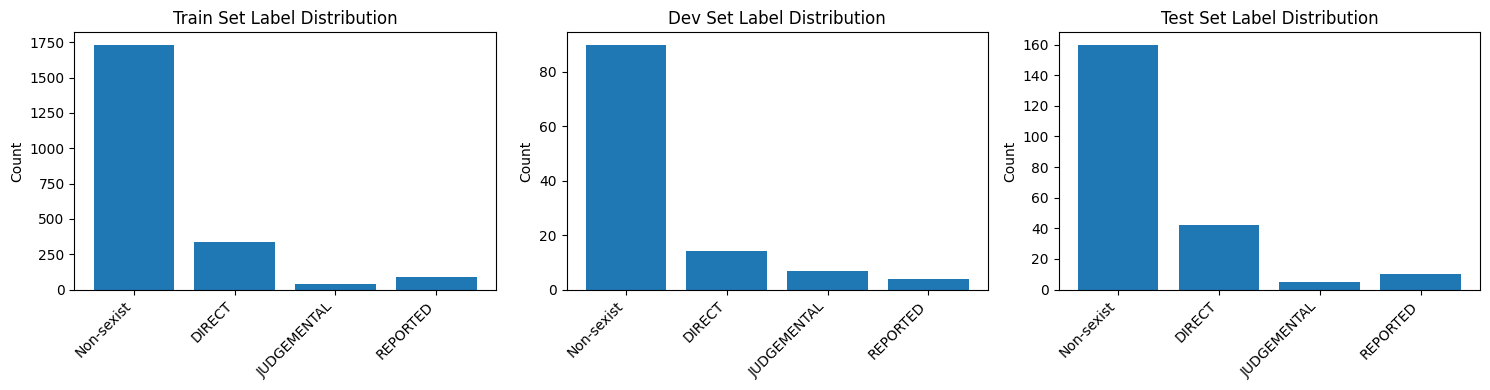

Task 1 completed!


In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
label_names = ['Non-sexist', 'DIRECT', 'JUDGEMENTAL', 'REPORTED']

for idx, (df, title) in enumerate([(train_df, 'Train'), (dev_df, 'Dev'), (test_df, 'Test')]):
    counts = df['label'].value_counts().sort_index()
    axes[idx].bar(range(len(counts)), counts.values)
    axes[idx].set_xticks(range(len(counts)))
    axes[idx].set_xticklabels(label_names, rotation=45, ha='right')
    axes[idx].set_title(f'{title} Set Label Distribution')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("Task 1 completed!")

# [Task2 - 0.5 points] Data Cleaning
In the context of tweets, we have noisy and informal data that often includes unnecessary elements like emojis, hashtags, mentions, and URLs. These elements may interfere with the text analysis.



### Instructions
- **Remove emojis** from the tweets.
- **Remove hashtags** (e.g., `#example`).
- **Remove mentions** such as `@user`.
- **Remove URLs** from the tweets.
- **Remove special characters and symbols**.
- **Remove specific quote characters** (e.g., curly quotes).
- **Perform lemmatization** to reduce words to their base form.

## Import Libraries for Text Cleaning

In [10]:
import re
import string
import nltk

# Download required NLTK data (including punkt_tab for newer NLTK versions)
try:
    nltk.download('punkt_tab')
except:
    pass
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer

print("Text cleaning libraries loaded!")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Text cleaning libraries loaded!


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


##  Define Text Cleaning Functions

In [11]:
def remove_urls(text):
    """Remove URLs from text"""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

def remove_mentions(text):
    """Remove @mentions from text"""
    mention_pattern = re.compile(r'@\w+')
    return mention_pattern.sub('', text)

def remove_hashtags(text):
    """Remove hashtags from text"""
    hashtag_pattern = re.compile(r'#\w+')
    return hashtag_pattern.sub('', text)

def remove_emojis(text):
    """Remove emojis from text"""
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub('', text)

def remove_special_chars(text):
    """Remove special characters and symbols"""
    # Keep only letters, numbers, and basic punctuation
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    return text

def remove_quote_chars(text):
    """Remove specific quote characters (curly quotes)"""
    # Replace curly quotes with straight quotes or remove them
    text = text.replace('"', '"').replace('"', '"')
    text = text.replace(''', "'").replace(''', "'")
    text = text.replace('…', '...')
    return text

def remove_extra_whitespace(text):
    """Remove extra whitespace"""
    return ' '.join(text.split())

print("Cleaning functions defined!")

Cleaning functions defined!


## Define Lemmatization Function

In [12]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """Lemmatize text to reduce words to their base form"""
    # Tokenize
    tokens = nltk.word_tokenize(text.lower())

    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join back to string
    return ' '.join(lemmatized_tokens)

# Test the function
test_text = "running runs ran runner"
print(f"Original: {test_text}")
print(f"Lemmatized: {lemmatize_text(test_text)}")

Original: running runs ran runner
Lemmatized: running run ran runner


## Apply All Cleaning Steps

In [13]:
def clean_tweet(text):
    # Convert to string if not already
    text = str(text)

    # Apply cleaning steps in order
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = remove_emojis(text)
    text = remove_quote_chars(text)
    text = remove_special_chars(text)
    text = remove_extra_whitespace(text)

    # Lemmatize
    text = lemmatize_text(text)

    # Final cleanup
    text = remove_extra_whitespace(text)

    return text.strip()

# Test on a sample tweet
sample_tweet = train_df['tweet'].iloc[0]
print("Original tweet:")
print(sample_tweet)
print("\nCleaned tweet:")
print(clean_tweet(sample_tweet))

Original tweet:
Writing a uni essay in my local pub with a coffee. Random old man keeps asking me drunk questions when I'm trying to concentrate &amp; ends with "good luck, but you'll just end up getting married and not use it anyway". #EverydaySexism is alive and well 🙃

Cleaned tweet:
writing a uni essay in my local pub with a coffee . random old man keep asking me drunk question when im trying to concentrate amp end with good luck , but youll just end up getting married and not use it anyway . is alive and well


## Apply Cleaning to All Datasets

In [14]:
# Apply cleaning to all datasets
print("Cleaning training set...")
train_df['cleaned_tweet'] = train_df['tweet'].apply(clean_tweet)

print("Cleaning validation set...")
dev_df['cleaned_tweet'] = dev_df['tweet'].apply(clean_tweet)

print("Cleaning test set...")
test_df['cleaned_tweet'] = test_df['tweet'].apply(clean_tweet)

print("Cleaning completed!")

Cleaning training set...
Cleaning validation set...
Cleaning test set...
Cleaning completed!


## Compare Original vs Cleaned Tweets

In [15]:
print("Examples of Original vs Cleaned Tweets:\n")
print("="*80)

for i in range(5):
    print(f"\nExample {i+1}:")
    print(f"Original:  {train_df['tweet'].iloc[i]}")
    print(f"Cleaned:   {train_df['cleaned_tweet'].iloc[i]}")
    print("-"*80)

Examples of Original vs Cleaned Tweets:


Example 1:
Original:  Writing a uni essay in my local pub with a coffee. Random old man keeps asking me drunk questions when I'm trying to concentrate &amp; ends with "good luck, but you'll just end up getting married and not use it anyway". #EverydaySexism is alive and well 🙃
Cleaned:   writing a uni essay in my local pub with a coffee . random old man keep asking me drunk question when im trying to concentrate amp end with good luck , but youll just end up getting married and not use it anyway . is alive and well
--------------------------------------------------------------------------------

Example 2:
Original:  According to a customer I have plenty of time to go spent the Stirling coins he wants to pay me with, in Derry. "Just like any other woman, I'm sure of it." #EveryDaySexism in retail.
Cleaned:   according to a customer i have plenty of time to go spent the stirling coin he want to pay me with , in derry . just like any other woman 

## Check for Empty Tweets After Cleaning

In [16]:
# Check if any tweets became empty after cleaning
empty_train = train_df[train_df['cleaned_tweet'].str.strip() == ''].shape[0]
empty_dev = dev_df[dev_df['cleaned_tweet'].str.strip() == ''].shape[0]
empty_test = test_df[test_df['cleaned_tweet'].str.strip() == ''].shape[0]

print(f"Empty tweets after cleaning:")
print(f"Train: {empty_train}")
print(f"Dev: {empty_dev}")
print(f"Test: {empty_test}")

# Remove empty tweets if any
if empty_train > 0:
    train_df = train_df[train_df['cleaned_tweet'].str.strip() != ''].copy()
    print(f"\nRemoved {empty_train} empty tweets from training set")

if empty_dev > 0:
    dev_df = dev_df[dev_df['cleaned_tweet'].str.strip() != ''].copy()
    print(f"Removed {empty_dev} empty tweets from dev set")

if empty_test > 0:
    test_df = test_df[test_df['cleaned_tweet'].str.strip() != ''].copy()
    print(f"Removed {empty_test} empty tweets from test set")

print(f"\nFinal dataset sizes:")
print(f"Train: {len(train_df)}")
print(f"Dev: {len(dev_df)}")
print(f"Test: {len(test_df)}")

print("\nTask 2 completed!")

Empty tweets after cleaning:
Train: 0
Dev: 0
Test: 0

Final dataset sizes:
Train: 2202
Dev: 115
Test: 217

Task 2 completed!


# [Task 3 - 0.5 points] Text Encoding
To train a neural sexism classifier, you first need to encode text into numerical format.




### Instructions

* Embed words using **GloVe embeddings**.
* You are **free** to pick any embedding dimension.





### What about OOV tokens?
   * All the tokens in the **training** set that are not in GloVe **must** be added to the vocabulary.
   * For the remaining tokens (i.e., OOV in the validation and test sets), you have to assign them a **special token** (e.g., ``<UNK>``) and a **static** embedding.
   * You are **free** to define the static embedding using any strategy (e.g., random, neighbourhood, etc...)



### More about OOV

For a given token:

* **If in train set**: add to vocabulary and assign an embedding (use GloVe if token in GloVe, custom embedding otherwise).
* **If in val/test set**: assign special token if not in vocabulary and assign custom embedding.

Your vocabulary **should**:

* Contain all tokens in train set; or
* Union of tokens in train set and in GloVe $\rightarrow$ we make use of existing knowledge!

## If you already have the embeding files there is no need to run next cell just load it !

## Download GloVe Embeddings

In [17]:
import urllib.request
import os

# Create directory for embeddings
if not os.path.exists('embeddings'):
    os.makedirs('embeddings')

# Use 50d - much smaller file (~170MB), downloads faster!
EMBEDDING_DIM = 50
glove_file = f'embeddings/glove.6B.{EMBEDDING_DIM}d.txt'

if not os.path.exists(glove_file):
    print(f"Downloading GloVe {EMBEDDING_DIM}d embeddings...")
    glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"

    urllib.request.urlretrieve(glove_url, 'embeddings/glove.6B.zip')

    print("Extracting...")
    import zipfile
    with zipfile.ZipFile('embeddings/glove.6B.zip', 'r') as zip_ref:
        zip_ref.extract(f'glove.6B.{EMBEDDING_DIM}d.txt', 'embeddings/')

    os.remove('embeddings/glove.6B.zip')
    print("Download complete!")
else:
    print("GloVe embeddings already downloaded!")

Extracting...
Download complete!


## Load GloVe Embeddings

In [18]:
def load_glove_embeddings(file_path, embedding_dim=50):
    """
    Load GloVe embeddings from file
    Returns a dictionary: {word: embedding_vector}
    """
    embeddings_index = {}

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector

    print(f"Loaded {len(embeddings_index)} word vectors.")
    return embeddings_index

# Load GloVe embeddings (using 100d, change if needed)
EMBEDDING_DIM = 50
glove_embeddings = load_glove_embeddings(f'embeddings/glove.6B.{EMBEDDING_DIM}d.txt', EMBEDDING_DIM)

print(f"Embedding dimension: {EMBEDDING_DIM}")
print(f"Sample word 'woman': {glove_embeddings.get('woman', 'Not found')[:5]}...")  # Show first 5 values

Loaded 400000 word vectors.
Embedding dimension: 50
Sample word 'woman': [-0.18153  0.64827 -0.5821  -0.49451  1.5415 ]...


## Build Vocabulary from Training Set

In [19]:
from collections import Counter

def build_vocabulary(texts):
    word_freq = Counter()

    for text in texts:
        tokens = text.split()
        word_freq.update(tokens)

    return word_freq

# Build vocabulary from training set
train_word_freq = build_vocabulary(train_df['cleaned_tweet'])

print(f"Total unique words in training set: {len(train_word_freq)}")
print(f"Total words (with repetitions): {sum(train_word_freq.values())}")
print(f"\nMost common words:")
for word, freq in train_word_freq.most_common(10):
    print(f"  {word}: {freq}")

Total unique words in training set: 8991
Total words (with repetitions): 60827

Most common words:
  .: 2245
  the: 2022
  ,: 1745
  a: 1687
  to: 1432
  and: 1251
  of: 1050
  i: 944
  is: 803
  it: 767


## Create Vocabulary with GloVe Words

In [20]:
# Create vocabulary: union of training set words and GloVe words
# This follows the instruction: "Union of tokens in train set and in GloVe"

# Special tokens
PAD_TOKEN = '<PAD>'
UNK_TOKEN = '<UNK>'

# Start with special tokens
vocab = {PAD_TOKEN: 0, UNK_TOKEN: 1}

# Add all words from training set
for word in train_word_freq.keys():
    if word not in vocab:
        vocab[word] = len(vocab)

# Add words from GloVe that are not in training set
# This enriches our vocabulary with additional known words
for word in glove_embeddings.keys():
    if word not in vocab:
        vocab[word] = len(vocab)

print(f"Vocabulary size: {len(vocab)}")
print(f"Words from training set: {len(train_word_freq)}")
print(f"Additional words from GloVe: {len(vocab) - len(train_word_freq) - 2}")  # -2 for special tokens

# Create reverse mapping
idx_to_word = {idx: word for word, idx in vocab.items()}

Vocabulary size: 401268
Words from training set: 8991
Additional words from GloVe: 392275


## Create Embedding Matrix

In [21]:
def create_embedding_matrix(vocab, embeddings_index, embedding_dim):
    """
    Create embedding matrix for all words in vocabulary
    """
    vocab_size = len(vocab)
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    # Track OOV statistics
    found_count = 0
    not_found_count = 0

    for word, idx in vocab.items():
        if word == PAD_TOKEN:
            # Padding token: all zeros
            embedding_matrix[idx] = np.zeros(embedding_dim)
        elif word == UNK_TOKEN:
            # Unknown token: random small values
            embedding_matrix[idx] = np.random.uniform(-0.25, 0.25, embedding_dim)
        elif word in embeddings_index:
            # Word found in GloVe
            embedding_matrix[idx] = embeddings_index[word]
            found_count += 1
        else:
            # OOV word from training set: random initialization
            embedding_matrix[idx] = np.random.uniform(-0.25, 0.25, embedding_dim)
            not_found_count += 1

    print(f"Embedding matrix shape: {embedding_matrix.shape}")
    print(f"Words found in GloVe: {found_count}")
    print(f"Words not found in GloVe (OOV): {not_found_count}")
    print(f"Coverage: {found_count / (found_count + not_found_count) * 100:.2f}%")

    return embedding_matrix

# Create embedding matrix
embedding_matrix = create_embedding_matrix(vocab, glove_embeddings, EMBEDDING_DIM)

Embedding matrix shape: (401268, 50)
Words found in GloVe: 400000
Words not found in GloVe (OOV): 1266
Coverage: 99.68%


## Text to Sequence Function

In [22]:
def text_to_sequence(text, vocab, unk_token='<UNK>'):
    """
    Convert text to sequence of token indices
    """
    tokens = text.split()
    sequence = []

    for token in tokens:
        if token in vocab:
            sequence.append(vocab[token])
        else:
            # OOV token: assign UNK token index
            sequence.append(vocab[unk_token])

    return sequence

# Test the function
sample_text = train_df['cleaned_tweet'].iloc[0]
sample_sequence = text_to_sequence(sample_text, vocab, UNK_TOKEN)

print(f"Original text: {sample_text}")
print(f"Sequence: {sample_sequence[:10]}...")  # Show first 10 indices
print(f"Sequence length: {len(sample_sequence)}")

Original text: writing a uni essay in my local pub with a coffee . random old man keep asking me drunk question when im trying to concentrate amp end with good luck , but youll just end up getting married and not use it anyway . is alive and well
Sequence: [2, 3, 4, 5, 6, 7, 8, 9, 10, 3]...
Sequence length: 48


## Convert All Datasets to Sequences

In [23]:
# Convert all datasets to sequences
print("Converting training set to sequences...")
train_sequences = train_df['cleaned_tweet'].apply(lambda x: text_to_sequence(x, vocab, UNK_TOKEN)).tolist()

print("Converting validation set to sequences...")
dev_sequences = dev_df['cleaned_tweet'].apply(lambda x: text_to_sequence(x, vocab, UNK_TOKEN)).tolist()

print("Converting test set to sequences...")
test_sequences = test_df['cleaned_tweet'].apply(lambda x: text_to_sequence(x, vocab, UNK_TOKEN)).tolist()

print("Conversion complete!")
print(f"Training sequences: {len(train_sequences)}")
print(f"Validation sequences: {len(dev_sequences)}")
print(f"Test sequences: {len(test_sequences)}")

Converting training set to sequences...
Converting validation set to sequences...
Converting test set to sequences...
Conversion complete!
Training sequences: 2202
Validation sequences: 115
Test sequences: 217


## Analyze Sequence Lengths

Sequence length statistics:

Training set:
  Mean: 27.62
  Median: 25.00
  Max: 64
  95th percentile: 54.00

Validation set:
  Mean: 29.17
  Median: 29.00
  Max: 60

Test set:
  Mean: 28.17
  Median: 27.00
  Max: 59


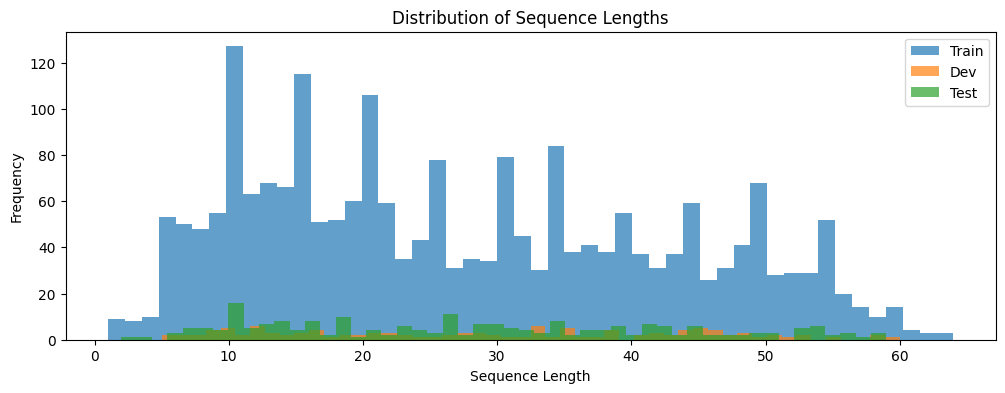

In [24]:
# Analyze sequence lengths to determine padding length
train_lengths = [len(seq) for seq in train_sequences]
dev_lengths = [len(seq) for seq in dev_sequences]
test_lengths = [len(seq) for seq in test_sequences]

print("Sequence length statistics:")
print(f"\nTraining set:")
print(f"  Mean: {np.mean(train_lengths):.2f}")
print(f"  Median: {np.median(train_lengths):.2f}")
print(f"  Max: {np.max(train_lengths)}")
print(f"  95th percentile: {np.percentile(train_lengths, 95):.2f}")

print(f"\nValidation set:")
print(f"  Mean: {np.mean(dev_lengths):.2f}")
print(f"  Median: {np.median(dev_lengths):.2f}")
print(f"  Max: {np.max(dev_lengths)}")

print(f"\nTest set:")
print(f"  Mean: {np.mean(test_lengths):.2f}")
print(f"  Median: {np.median(test_lengths):.2f}")
print(f"  Max: {np.max(test_lengths)}")

# Visualize distribution
plt.figure(figsize=(12, 4))
plt.hist(train_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(dev_lengths, bins=50, alpha=0.7, label='Dev')
plt.hist(test_lengths, bins=50, alpha=0.7, label='Test')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.legend()
plt.show()

## Pad Sequences

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Choose max length (you can adjust this based on the distribution)
# Using 95th percentile is a good balance
MAX_LENGTH = int(np.percentile(train_lengths, 95))
print(f"Using MAX_LENGTH: {MAX_LENGTH}")

# Pad sequences
train_padded = pad_sequences(train_sequences, maxlen=MAX_LENGTH, padding='post', truncating='post', value=vocab[PAD_TOKEN])
dev_padded = pad_sequences(dev_sequences, maxlen=MAX_LENGTH, padding='post', truncating='post', value=vocab[PAD_TOKEN])
test_padded = pad_sequences(test_sequences, maxlen=MAX_LENGTH, padding='post', truncating='post', value=vocab[PAD_TOKEN])

print(f"Padded shapes:")
print(f"  Train: {train_padded.shape}")
print(f"  Dev: {dev_padded.shape}")
print(f"  Test: {test_padded.shape}")

# Get labels as numpy arrays
train_labels = train_df['label'].values
dev_labels = dev_df['label'].values
test_labels = test_df['label'].values

print(f"\nLabel shapes:")
print(f"  Train: {train_labels.shape}")
print(f"  Dev: {dev_labels.shape}")
print(f"  Test: {test_labels.shape}")

print("\nTask 3 completed!")

Using MAX_LENGTH: 54
Padded shapes:
  Train: (2202, 54)
  Dev: (115, 54)
  Test: (217, 54)

Label shapes:
  Train: (2202,)
  Dev: (115,)
  Test: (217,)

Task 3 completed!


# [Task 4 - 1.0 points] Model definition

You are now tasked to define your sexism classifier.




### Instructions

* **Baseline**: implement a Bidirectional LSTM with a Dense layer on top.

* **Stacked**: add an additional Bidirectional LSTM layer to the Baseline model.

**Note**: You are **free** to experiment with hyper-parameters.

### Token to embedding mapping

You can follow two approaches for encoding tokens in your classifier.

### Work directly with embeddings

- Compute the embedding of each input token
- Feed the mini-batches of shape ``(batch_size, # tokens, embedding_dim)`` to your model

### Work with Embedding layer

- Encode input tokens to token ids
- Define a Embedding layer as the first layer of your model
- Compute the embedding matrix of all known tokens (i.e., tokens in your vocabulary)
- Initialize the Embedding layer with the computed embedding matrix
- You are **free** to set the Embedding layer trainable or not

In [26]:
import tensorflow as tf

vocab_size = len(vocab)
embedding_dimension = EMBEDDING_DIM

embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                      output_dim=embedding_dimension,
                                      weights=[embedding_matrix],
                                      mask_zero=True,                   # automatically masks padding tokens
                                      name='encoder_embedding')

## Import Deep Learning Libraries

In [27]:

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Embedding, LSTM, Bidirectional, Dense,
    Dropout, Input, Masking
)

print(f"TensorFlow version: {tf.__version__}")
print("Libraries imported successfully!")

TensorFlow version: 2.19.0
Libraries imported successfully!


## Set Random Seeds for Reproducibility

In [28]:
def set_seeds(seed=42):
    """Set all random seeds for reproducibility"""
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seeds(42)
print("Random seeds set!")

Random seeds set!


## Define Baseline Model (BiLSTM + Dense)

In [29]:
def create_baseline_model(vocab_size, embedding_dim, embedding_matrix, max_length, num_classes=4):

    model = Sequential([
        # Embedding layer with pre-trained GloVe embeddings
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            weights=[embedding_matrix],
            input_length=max_length,
            mask_zero=True,  # Automatically masks padding
            trainable=True,  # Can be set to False if you want frozen embeddings
            name='embedding'
        ),

        # Bidirectional LSTM layer
        Bidirectional(
            LSTM(
                units=64,  # You can adjust this hyperparameter
                dropout=0.2,
                recurrent_dropout=0.2,
                return_sequences=False
            ),
            name='bidirectional_lstm'
        ),

        # Output Dense layer
        Dense(num_classes, activation='softmax', name='output')
    ])

    return model

# Create baseline model
baseline_model = create_baseline_model(
    vocab_size=len(vocab),
    embedding_dim=EMBEDDING_DIM,
    embedding_matrix=embedding_matrix,
    max_length=MAX_LENGTH,
    num_classes=4
)

# Display model architecture
print("=" * 60)
print("BASELINE MODEL ARCHITECTURE")
print("=" * 60)
baseline_model.summary()

BASELINE MODEL ARCHITECTURE


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    20,063,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm              │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,063,400 (76.54 MB)

 Trainable params: 20,063,400 (76.54 MB)

 Non-trainable params: 0 (0.00 B)

## Define Stacked Model (2 BiLSTMs + Dense)

In [30]:
def create_stacked_model(vocab_size, embedding_dim, embedding_matrix, max_length, num_classes=4):
    """
    Stacked Model: Two Bidirectional LSTM layers with Dense layer

    Architecture:
    - Embedding layer (loaded with GloVe)
    - Bidirectional LSTM (returns sequences)
    - Bidirectional LSTM
    - Dense output layer
    """
    model = Sequential([
        # Embedding layer with pre-trained GloVe embeddings
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            weights=[embedding_matrix],
            input_length=max_length,
            mask_zero=True,
            trainable=True,
            name='embedding'
        ),

        # First Bidirectional LSTM layer (must return sequences)
        Bidirectional(
            LSTM(
                units=64,  # You can adjust this hyperparameter
                dropout=0.2,
                recurrent_dropout=0.2,
                return_sequences=True  # Important: return sequences for next LSTM
            ),
            name='bidirectional_lstm_1'
        ),

        # Second Bidirectional LSTM layer
        Bidirectional(
            LSTM(
                units=32,  # You can adjust this hyperparameter
                dropout=0.2,
                recurrent_dropout=0.2,
                return_sequences=False
            ),
            name='bidirectional_lstm_2'
        ),

        # Output Dense layer
        Dense(num_classes, activation='softmax', name='output')
    ])

    return model

# Create stacked model
stacked_model = create_stacked_model(
    vocab_size=len(vocab),
    embedding_dim=EMBEDDING_DIM,
    embedding_matrix=embedding_matrix,
    max_length=MAX_LENGTH,
    num_classes=4
)

# Display model architecture
print("=" * 60)
print("STACKED MODEL ARCHITECTURE")
print("=" * 60)
stacked_model.summary()

STACKED MODEL ARCHITECTURE


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    20,063,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm_1            │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm_2            │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,063,400 (76.54 MB)

 Trainable params: 20,063,400 (76.54 MB)

 Non-trainable params: 0 (0.00 B)

## Compare Model Architectures

In [31]:
# Build the models first by specifying input shape
baseline_model.build(input_shape=(None, MAX_LENGTH))
stacked_model.build(input_shape=(None, MAX_LENGTH))

# Compare model parameters
print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

baseline_params = baseline_model.count_params()
stacked_params = stacked_model.count_params()

print(f"Baseline Model Parameters: {baseline_params:,}")
print(f"Stacked Model Parameters:  {stacked_params:,}")
print(f"Difference:                {stacked_params - baseline_params:,}")
print(f"Stacked is {stacked_params/baseline_params:.2f}x larger")
print("\nTask 4 completed!")


MODEL COMPARISON
Baseline Model Parameters: 20,122,796
Stacked Model Parameters:  20,163,756
Difference:                40,960
Stacked is 1.00x larger

Task 4 completed!


## Compile Models (Preparation for Training)

In [32]:
def compile_model(model, learning_rate=0.001):
    """
    Compile model with appropriate loss and metrics
    """
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',  # For integer labels
        metrics=['accuracy']
    )
    return model

# Note: We'll compile with different seeds during training
# This is just to verify compilation works
print("Models can be compiled successfully!")
print("We'll compile with different seeds during training in Task 5")

Models can be compiled successfully!
We'll compile with different seeds during training in Task 5


# [Task 5 - 1.0 points] Training and Evaluation

You are now tasked to train and evaluate the Baseline and Stacked models.



### Instructions

* Pick **at least** three seeds for robust estimation.
* Train **all** models on the train set.
* Evaluate **all** models on the validation set.
* Compute macro F1-score, precision, and recall metrics on the validation set.
* Report average and standard deviation measures over seeds for each metric.
* Pick the **best** performing model according to the observed validation set performance (use macro F1-score).

## Import Evaluation Functions

In [33]:
from sklearn.metrics import f1_score, precision_score, recall_score


def evaluate_on_validation(model, X_val, y_val):
    """
    Run model on validation set and compute macro F1 / precision / recall.
    """
    # Predict class probabilities
    y_proba = model.predict(X_val, batch_size=128, verbose=0)
    # Convert to class indices
    y_pred = y_proba.argmax(axis=1)

    f1 = f1_score(y_val, y_pred, average='macro', zero_division=0)
    prec = precision_score(y_val, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_val, y_pred, average='macro', zero_division=0)

    return {
        "f1_macro": f1,
        "precision_macro": prec,
        "recall_macro": rec,
    }


## Define Training Procedure with Multiple Seeds

In [34]:
SEEDS = [42, 1337, 2025]
BATCH_SIZE = 64
EPOCHS = 20

from tensorflow.keras.callbacks import EarlyStopping

def train_and_evaluate_model(model_name, model_fn, seeds,
                             X_train, y_train, X_val, y_val):
    """
    Train and evaluate a model (baseline or stacked) for multiple seeds.
    Returns a list of result dicts (one per seed).
    """
    results = []
    models = []

    for seed in seeds:
        print("\n" + "="*70)
        print(f"Training {model_name} with seed {seed}")
        print("="*70)

        # 1) set seeds
        set_seeds(seed)

        # 2) (re)create fresh model
        model = model_fn(
            vocab_size=len(vocab),
            embedding_dim=EMBEDDING_DIM,
            embedding_matrix=embedding_matrix,
            max_length=MAX_LENGTH,
            num_classes=4
        )

        # 3) compile
        compile_model(model, learning_rate=1e-3)

        # 4) callbacks (early stopping)
        callbacks = [
            EarlyStopping(
                monitor="val_loss",
                patience=3,
                restore_best_weights=True,
                verbose=1
            )
        ]

        # 5) train
        history = model.fit(
            X_train,
            y_train,
            validation_data=(X_val, y_val),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            callbacks=callbacks,
            verbose=1
        )

        # 6) evaluate on validation set
        metrics = evaluate_on_validation(model, X_val, y_val)

        # 7) store results
        result = {
            "model": model_name,
            "seed": seed,
            "val_accuracy": history.history["val_accuracy"][-1],
            **metrics
        }
        model_result = {
            f"{model_name}_{seed}": model
        }
        results.append(result)
        models.append(model_result)

        print(f"\nValidation results for {model_name} (seed {seed}):")
        for k, v in metrics.items():
            print(f"  {k}: {v:.4f}")

    return (results, models)


## Train Baseline and Stacked Models

In [35]:
baseline_results, baseline_models = train_and_evaluate_model(
    model_name="baseline_bilstm",
    model_fn=create_baseline_model,
    seeds=SEEDS,
    X_train=train_padded,
    y_train=train_labels,
    X_val=dev_padded,
    y_val=dev_labels
)

stacked_results, stacked_models = train_and_evaluate_model(
    model_name="stacked_bilstm",
    model_fn=create_stacked_model,
    seeds=SEEDS,
    X_train=train_padded,
    y_train=train_labels,
    X_val=dev_padded,
    y_val=dev_labels
)



Training baseline_bilstm with seed 42
Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 438ms/step - accuracy: 0.5710 - loss: 1.0610 - val_accuracy: 0.7826 - val_loss: 0.7961
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 422ms/step - accuracy: 0.7771 - loss: 0.6827 - val_accuracy: 0.7826 - val_loss: 0.7551
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 415ms/step - accuracy: 0.7793 - loss: 0.6400 - val_accuracy: 0.7826 - val_loss: 0.7248
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 411ms/step - accuracy: 0.7883 - loss: 0.6064 - val_accuracy: 0.7913 - val_loss: 0.7082
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 413ms/step - accuracy: 0.7998 - loss: 0.5781 - val_accuracy: 0.7826 - val_loss: 0.7027
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 411ms/step - accuracy: 0.8086 - loss: 0.5434 - val_accuracy: 0.7826 - val_loss: 0.7092
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 415ms/step - accuracy: 0.8302 - loss: 0.4890 - val_accuracy: 0.8000 - val_loss: 0.6802
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 418ms/step - acc

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 445ms/step - accuracy: 0.6357 - loss: 0.9768 - val_accuracy: 0.7826 - val_loss: 0.8026
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 415ms/step - accuracy: 0.7843 - loss: 0.6639 - val_accuracy: 0.7913 - val_loss: 0.7570
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 418ms/step - accuracy: 0.7901 - loss: 0.6200 - val_accuracy: 0.7826 - val_loss: 0.7335
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 423ms/step - accuracy: 0.8011 - loss: 0.5840 - val_accuracy: 0.7739 - val_loss: 0.7097
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 411ms/step - accuracy: 0.8121 - loss: 0.5362 - val_accuracy: 0.7826 - val_loss: 0.7086
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 412ms/step - accuracy: 0.8239 - loss: 0.5029 - val_accuracy: 0.7826 - val_loss: 0.6871
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 411ms/step - accuracy: 0.8407 - loss: 0.4542 - val_accuracy: 0.7826 - val_loss: 0.6820
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 413ms/step - accuracy: 0.8567 - loss: 0.4049 - val_accu

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 442ms/step - accuracy: 0.6166 - loss: 1.0376 - val_accuracy: 0.7826 - val_loss: 0.8151
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 417ms/step - accuracy: 0.7883 - loss: 0.6821 - val_accuracy: 0.7826 - val_loss: 0.7649
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 411ms/step - accuracy: 0.7887 - loss: 0.6392 - val_accuracy: 0.7826 - val_loss: 0.7650
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 409ms/step - accuracy: 0.8000 - loss: 0.5946 - val_accuracy: 0.7826 - val_loss: 0.7608
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 415ms/step - accuracy: 0.8132 - loss: 0.5616 - val_accuracy: 0.7913 - val_loss: 0.7539
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 413ms/step - accuracy: 0.8189 - loss: 0.5267 - val_accuracy: 0.7913 - val_loss: 0.7350
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 430ms/step - accuracy: 0.8253 - loss: 0.4928 - val_accuracy: 0.8000 - val_loss: 0.7406
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 429ms/step - accuracy: 0.8478 - loss: 0.4462 - val_accu

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 44s 876ms/step - accuracy: 0.6485 - loss: 0.9346 - val_accuracy: 0.7826 - val_loss: 0.7852
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 810ms/step - accuracy: 0.7784 - loss: 0.6823 - val_accuracy: 0.7913 - val_loss: 0.7367
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 809ms/step - accuracy: 0.7843 - loss: 0.6379 - val_accuracy: 0.7739 - val_loss: 0.7269
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 807ms/step - accuracy: 0.7827 - loss: 0.6128 - val_accuracy: 0.7913 - val_loss: 0.7300
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 818ms/step - accuracy: 0.7982 - loss: 0.5819 - val_accuracy: 0.7826 - val_loss: 0.6927
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 814ms/step - accuracy: 0.8143 - loss: 0.5361 - val_accuracy: 0.7826 - val_loss: 0.7024
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 814ms/step - accuracy: 0.8307 - loss: 0.4884 - val_accuracy: 0.7913 - val_loss: 0.6932
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 814ms/step - accuracy: 0.8416 - loss: 0.4338 - val_accu

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 44s 870ms/step - accuracy: 0.6269 - loss: 0.9963 - val_accuracy: 0.7826 - val_loss: 0.7674
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 814ms/step - accuracy: 0.7801 - loss: 0.6772 - val_accuracy: 0.7826 - val_loss: 0.7414
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 809ms/step - accuracy: 0.7835 - loss: 0.6235 - val_accuracy: 0.7826 - val_loss: 0.7391
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 821ms/step - accuracy: 0.7993 - loss: 0.6019 - val_accuracy: 0.7652 - val_loss: 0.6945
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 817ms/step - accuracy: 0.8119 - loss: 0.5417 - val_accuracy: 0.7913 - val_loss: 0.6615
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 816ms/step - accuracy: 0.8181 - loss: 0.5182 - val_accuracy: 0.7913 - val_loss: 0.6791
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 42s 832ms/step - accuracy: 0.8276 - loss: 0.4844 - val_accuracy: 0.7739 - val_loss: 0.6621
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 822ms/step - accuracy: 0.8500 - loss: 0.4292 - val_accu

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Validation results for stacked_bilstm (seed 1337):
  f1_macro: 0.4707
  precision_macro: 0.4855
  recall_macro: 0.4627

Training stacked_bilstm with seed 2025
Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 43s 866ms/step - accuracy: 0.7135 - loss: 0.8674 - val_accuracy: 0.7826 - val_loss: 0.7819
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 831ms/step - accuracy: 0.7871 - loss: 0.6681 - val_accuracy: 0.7826 - val_loss: 0.7562
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 30s 834ms/step - accuracy: 0.7914 - loss: 0.6278 - val_accuracy: 0.7913 - val_loss: 0.7375
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 813ms/step - accuracy: 0.7947 - loss: 0.5885 - val_accuracy: 0.7739 - val_loss: 0.7281
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 811ms/step - accuracy: 0.8066 - loss: 0.5559 - val_accuracy: 0.7913 - val_loss: 0.7024
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 809ms/step - accuracy: 0.8310 - loss: 0.5158 - val_accuracy: 0.7826 - val_loss: 0.7096
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 818ms/step - accuracy: 0


Validation results for stacked_bilstm (seed 2025):
  f1_macro: 0.4201
  precision_macro: 0.5650
  recall_macro: 0.3907


## Aggregate Metrics (Mean + Standard Deviation)

In [36]:
# Put everything into one DataFrame
all_results = pd.DataFrame(baseline_results + stacked_results)
all_results


,model,seed,val_accuracy,f1_macro,precision_macro,recall_macro
0,baseline_bilstm,42,0.800000,0.424145,0.420455,0.429762
1,baseline_bilstm,1337,0.765217,0.508101,0.578401,0.480556
2,baseline_bilstm,2025,0.800000,0.465417,0.546791,0.429762
3,stacked_bilstm,42,0.800000,0.357969,0.344017,0.418651
4,stacked_bilstm,1337,0.747826,0.470745,0.485544,0.462698
5,stacked_bilstm,2025,0.834783,0.420112,0.564951,0.390675


In [37]:
summary = (
    all_results
    .groupby("model")[["f1_macro", "precision_macro", "recall_macro"]]
    .agg(["mean", "std"])
)

print("\n===== Validation performance over seeds (macro metrics) =====")
print(summary)



===== Validation performance over seeds (macro metrics) =====
                 f1_macro           precision_macro           recall_macro  \
                     mean       std            mean       std         mean   
model                                                                        
baseline_bilstm  0.465888  0.041980        0.515216  0.083574     0.446693   
stacked_bilstm   0.416275  0.056486        0.464837  0.111913     0.424008   

                           
                      std  
model                      
baseline_bilstm  0.029326  
stacked_bilstm   0.036310  


## Select the Best Model


In [38]:
mean_f1 = summary["f1_macro"]["mean"]
best_model_name = mean_f1.idxmax()

print("\nBest model according to macro F1:")
print(f"  {best_model_name}  (F1 = {mean_f1[best_model_name]:.4f})")



Best model according to macro F1:
  baseline_bilstm  (F1 = 0.4659)


### Find best seed of that model

In [39]:
best_row_idx = all_results[all_results["model"] == best_model_name]["f1_macro"].idxmax()
best_config = all_results.loc[best_row_idx]

print("\nBest configuration (model + seed):")
print(best_config)



Best configuration (model + seed):
model              baseline_bilstm
seed                          1337
val_accuracy              0.765217
f1_macro                  0.508101
precision_macro           0.578401
recall_macro              0.480556
Name: 1, dtype: object


# [Task 6 - 1.0 points] Transformers

In this section, you will use a transformer model specifically trained for hate speech detection, namely [Twitter-roBERTa-base for Hate Speech Detection](https://huggingface.co/cardiffnlp/twitter-roberta-base-hate).




### Relevant Material
- Tutorial 3

### Instructions
- **Load the Tokenizer and Model**

- **Preprocess the Dataset**:
   You will need to preprocess your dataset to prepare it for input into the model. Tokenize your text data using the appropriate tokenizer and ensure it is formatted correctly.

- **Train the Model**:
   Use the `Trainer` to train the model on your training data.

- **Evaluate the Model on the Test Set** using the same metrics used for LSTM-based models.

## Install & Import Libraries

In [40]:
# Install HuggingFace libraries (quiet mode)
!pip install -q transformers datasets

# Import model + tokenizer + Trainer utilities
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer,
    set_seed as hf_set_seed,
)

# HuggingFace Dataset utilities
from datasets import Dataset, DatasetDict

# Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Transformers and Datasets libraries imported successfully!")


Transformers and Datasets libraries imported successfully!


## Convert DataFrames to HuggingFace Datasets

In [41]:
# We rename 'cleaned_tweet' → 'text' (the expected input field name)
train_hf = Dataset.from_pandas(
    train_df[["cleaned_tweet", "label"]].rename(columns={"cleaned_tweet": "text"}),
    preserve_index=False,
)

dev_hf = Dataset.from_pandas(
    dev_df[["cleaned_tweet", "label"]].rename(columns={"cleaned_tweet": "text"}),
    preserve_index=False,
)

test_hf = Dataset.from_pandas(
    test_df[["cleaned_tweet", "label"]].rename(columns={"cleaned_tweet": "text"}),
    preserve_index=False,
)

# Organize everything into a DatasetDict
datasets_roberta = DatasetDict({
    "train": train_hf,
    "validation": dev_hf,
    "test": test_hf,
})

print("Datasets converted for transformer training.")
datasets_roberta


Datasets converted for transformer training.


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 2202
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 115
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 217
    })
})

## Load Tokenizer and Model

In [42]:
# Pretrained RoBERTa Twitter hate-speech model
model_name = "cardiffnlp/twitter-roberta-base-hate"

# Load tokenizer (handles subword tokenization)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Label mapping: same as earlier tasks
label2id = {
    0: "-",
    1: "DIRECT",
    2: "JUDGEMENTAL",
    3: "REPORTED",
}
id2label = {v: k for k, v in label2id.items()}

# Define model with 4 output classes (same labels as our LSTM models)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=4,                           # We have 4 labels: -, DIRECT, JUDGEMENTAL, REPORTED
    problem_type="single_label_classification",  # Standard classification setting
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
)

print("Tokenizer and model loaded successfully!")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-hate and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizer and model loaded successfully!


## Tokenize the Dataset

In [43]:
# Maximum sequence length; tweets are short, 128 is safe
MAX_LENGTH_ROBERTA = 128

def tokenize_function(examples):
    """
    Tokenizes text using RoBERTa tokenizer.
    - Truncates to max length
    - Produces input_ids, attention_mask, etc.
    """
    return tokenizer(
        examples["text"],
        truncation=True,
        max_length=MAX_LENGTH_ROBERTA,
    )

# Apply tokenization to each split
tokenized_datasets = datasets_roberta.map(
    tokenize_function,
    batched=True,         # process in batches
    remove_columns=["text"],  # keep only tokenized fields + labels
)

# Automatically handles padding inside DataLoader
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

print("Tokenization completed!")
tokenized_datasets


Map:   0%|          | 0/2202 [00:00<?, ? examples/s]

Map:   0%|          | 0/115 [00:00<?, ? examples/s]

Map:   0%|          | 0/217 [00:00<?, ? examples/s]

Tokenization completed!


DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 2202
    })
    validation: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 115
    })
    test: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 217
    })
})

## Define Metrics for Trainer

In [44]:
def compute_metrics(eval_pred):
    """
    Computes the same metrics used for the LSTM models:
    - macro F1
    - macro Precision
    - macro Recall
    - Accuracy (extra)
    """
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)

    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="macro", zero_division=0)
    prec = precision_score(labels, preds, average="macro", zero_division=0)
    rec = recall_score(labels, preds, average="macro", zero_division=0)

    return {
        "accuracy": acc,
        "f1_macro": f1,
        "precision_macro": prec,
        "recall_macro": rec,
    }


## Configure Trainer

In [45]:
import transformers
print(transformers.__version__)


4.57.1


In [46]:
import transformers
from transformers import Trainer
from transformers.training_args import TrainingArguments  # <- import from the correct module

print("Transformers version:", transformers.__version__)
print("TrainingArguments class:", TrainingArguments)


Transformers version: 4.57.1
TrainingArguments class: <class 'transformers.training_args.TrainingArguments'>


In [47]:
hf_set_seed(42)  # reproducibility

training_args = transformers.TrainingArguments(
    output_dir="twitter-roberta-sexism",     # folder to save models
    eval_strategy="epoch",             # evaluate after each epoch
    save_strategy="epoch",                   # save model each epoch
    load_best_model_at_end=True,             # restore best model (based on metric)
    metric_for_best_model="f1_macro",        # choose best checkpoint by macro F1
    greater_is_better=True,

    num_train_epochs=5,                      # 3–5 is typical for RoBERTa finetuning
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,

    weight_decay=0.01,                       # regularization
    logging_steps=50,
    save_total_limit=2,                      # keep best 2 checkpoints
    report_to="none",                        # Disable all integrations like W&B
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print("Trainer initialized.")

/tmp/ipython-input-935271741.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Trainer initialized.


## Train the Transformer Model

In [48]:
# Disable W&B logging so it doesn't ask for API key
import os
os.environ["WANDB_DISABLED"] = "true"

# Train the model
train_result = trainer.train()

# Save final model
trainer.save_model("twitter-roberta-sexism")  # saves pytorch_model.bin
tokenizer.save_pretrained("twitter-roberta-sexism")

print("RoBERTa training complete!")


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,Precision Macro,Recall Macro
1,0.514400,0.517101,0.852174,0.405859,0.368933,0.468254
2,0.358000,0.419868,0.869565,0.517376,0.646365,0.503373
3,0.229700,0.424363,0.878261,0.524059,0.645833,0.521230
4,0.118100,0.590101,0.878261,0.569375,0.597500,0.550794
5,0.087700,0.524853,0.895652,0.711988,0.949773,0.622222


RoBERTa training complete!


## Evaluation on Validation and Test Sets

In [49]:
# Evaluate on validation set
val_metrics_roberta = trainer.evaluate(tokenized_datasets["validation"])
print("\n===== RoBERTa — Validation Set Metrics =====")
for k, v in val_metrics_roberta.items():
    if k.startswith("eval_"):
        print(f"{k}: {v:.4f}")



===== RoBERTa — Validation Set Metrics =====
eval_loss: 0.5249
eval_accuracy: 0.8957
eval_f1_macro: 0.7120
eval_precision_macro: 0.9498
eval_recall_macro: 0.6222
eval_runtime: 0.4991
eval_samples_per_second: 230.4190
eval_steps_per_second: 8.0150


In [50]:
# Evaluate on test set
test_metrics_roberta = trainer.evaluate(eval_dataset=tokenized_datasets["test"])
print("\n===== RoBERTa — Test Set Metrics =====")
for k, v in test_metrics_roberta.items():
    if k.startswith("eval_"):
        print(f"{k}: {v:.4f}")


===== RoBERTa — Test Set Metrics =====
eval_loss: 0.7369
eval_accuracy: 0.8479
eval_f1_macro: 0.5234
eval_precision_macro: 0.5036
eval_recall_macro: 0.5496
eval_runtime: 0.7557
eval_samples_per_second: 287.1600
eval_steps_per_second: 9.2630


# [Task 7 - 0.5 points] Error Analysis

After evaluating the model, perform a brief error analysis:

### Instructions

 - Review the results and identify common errors.

 - Summarize your findings regarding the errors and their impact on performance (e.g. but not limited to Out-of-Vocabulary (OOV) words, data imbalance, and performance differences between the custom model and the transformer...)
 - Suggest possible solutions to address the identified errors.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, confusion_matrix,
    f1_score, precision_score, recall_score
)
import seaborn as sns

PART 1: GET PREDICTIONS FROM BOTH MODELS ON TEST SET

LSTM vs TRANSFORMER

Let's generate preditions
Get predictions from best LSTM model (Baseline with seed 42)
generate predictions with roberta

In [59]:
target_names = ['No Sexism (-)', 'DIRECT', 'JUDGEMENTAL', 'REPORTED']
label2id = {0: "-", 1: "DIRECT", 2: "JUDGEMENTAL", 3: "REPORTED"}
best_lstm_model = baseline_models[1]['baseline_bilstm_1337']  # Use the best model from Task 5
y_lstm_proba = best_lstm_model.predict(test_padded, batch_size=128, verbose=0)
y_lstm_pred = np.argmax(y_lstm_proba, axis=1)
y_true = test_labels
try:
    transformer_predictions = trainer.predict(tokenized_datasets["test"])
    y_transformer_pred = np.argmax(transformer_predictions.predictions, axis=1)
    print("✓ Transformer predictions obtained successfully")
except Exception as e:
    print(f"✗ Could not obtain transformer predictions: {e}")
    y_transformer_pred = None

✓ Transformer predictions obtained successfully


PART 2: PERFORMANCE COMPARISON (Metrics)

In [60]:
# Compute metrics for LSTM
lstm_f1_macro = f1_score(y_true, y_lstm_pred, average='macro', zero_division=0)
lstm_precision_macro = precision_score(y_true, y_lstm_pred, average='macro', zero_division=0)
lstm_recall_macro = recall_score(y_true, y_lstm_pred, average='macro', zero_division=0)
lstm_f1_weighted = f1_score(y_true, y_lstm_pred, average='weighted', zero_division=0)

# Compute per-class metrics for LSTM
lstm_f1_per_class = f1_score(y_true, y_lstm_pred, average=None, zero_division=0)
lstm_precision_per_class = precision_score(y_true, y_lstm_pred, average=None, zero_division=0)
lstm_recall_per_class = recall_score(y_true, y_lstm_pred, average=None, zero_division=0)

# Per-class breakdown

# Transformer metrics
if y_transformer_pred is not None:
    transformer_f1_macro = f1_score(y_true, y_transformer_pred, average='macro', zero_division=0)
    transformer_precision_macro = precision_score(y_true, y_transformer_pred, average='macro', zero_division=0)
    transformer_recall_macro = recall_score(y_true, y_transformer_pred, average='macro', zero_division=0)
    transformer_f1_weighted = f1_score(y_true, y_transformer_pred, average='weighted', zero_division=0)

    transformer_f1_per_class = f1_score(y_true, y_transformer_pred, average=None, zero_division=0)
    transformer_precision_per_class = precision_score(y_true, y_transformer_pred, average=None, zero_division=0)
    transformer_recall_per_class = recall_score(y_true, y_transformer_pred, average=None, zero_division=0)

    print("\n--- Transformer Model (Test Set) ---")
    print(f"Macro F1:     {transformer_f1_macro:.4f}")
    print(f"Macro Precision: {transformer_precision_macro:.4f}")
    print(f"Macro Recall: {transformer_recall_macro:.4f}")
    print(f"Weighted F1:  {transformer_f1_weighted:.4f}")

    # Performance Gap
    print("\n--- Performance Gap (Transformer - LSTM) ---")
    print(f"Macro F1 Delta:     {transformer_f1_macro - lstm_f1_macro:+.4f}")
    print(f"Macro Precision Delta: {transformer_precision_macro - lstm_precision_macro:+.4f}")
    print(f"Macro Recall Delta: {transformer_recall_macro - lstm_recall_macro:+.4f}")
# Per-class metrics for LSTM
lstm_df = pd.DataFrame({
    "Model": "LSTM",
    "Class": target_names,
    "F1": lstm_f1_per_class,
    "Precision": lstm_precision_per_class,
    "Recall": lstm_recall_per_class
})

# Per-class metrics for Transformer
transformer_df = pd.DataFrame({
    "Model": "Transformer",
    "Class": target_names,
    "F1": transformer_f1_per_class,
    "Precision": transformer_precision_per_class,
    "Recall": transformer_recall_per_class
})

# Combination of per-class metrics
per_class_df = pd.concat([lstm_df, transformer_df], ignore_index=True)

# Add overall metrics
overall_df = pd.DataFrame({
    "Model": ["LSTM", "Transformer", "Delta (Transformer - LSTM)"],
    "Class": ["Overall", "Overall", "Overall"],
    "F1": [lstm_f1_macro, transformer_f1_macro, transformer_f1_macro - lstm_f1_macro],
    "Precision": [lstm_precision_macro, transformer_precision_macro, transformer_precision_macro - lstm_precision_macro],
    "Recall": [lstm_recall_macro, transformer_recall_macro, transformer_recall_macro - lstm_recall_macro]
})

# Show results
print("=== Per-Class Metrics ===")
display(per_class_df)

print("\n=== Overall Metrics ===")
display(overall_df)




--- Transformer Model (Test Set) ---
Macro F1:     0.5234
Macro Precision: 0.5036
Macro Recall: 0.5496
Weighted F1:  0.8431

--- Performance Gap (Transformer - LSTM) ---
Macro F1 Delta:     +0.0904
Macro Precision Delta: -0.0813
Macro Recall Delta: +0.1320
=== Per-Class Metrics ===


,Model,Class,F1,Precision,Recall
0,LSTM,No Sexism (-),0.866873,0.858896,0.875000
1,LSTM,DIRECT,0.531915,0.480769,0.595238
2,LSTM,JUDGEMENTAL,0.000000,0.000000,0.000000
3,LSTM,REPORTED,0.333333,1.000000,0.200000
4,Transformer,No Sexism (-),0.918239,0.924051,0.912500
5,Transformer,DIRECT,0.758621,0.733333,0.785714
6,Transformer,JUDGEMENTAL,0.000000,0.000000,0.000000
7,Transformer,REPORTED,0.416667,0.357143,0.500000



=== Overall Metrics ===


,Model,Class,F1,Precision,Recall
0,LSTM,Overall,0.433030,0.584916,0.417560
1,Transformer,Overall,0.523382,0.503632,0.549554
2,Delta (Transformer - LSTM),Overall,0.090351,-0.081285,0.131994


PART 3: CONFUSION MATRICES & VISUALIZATION

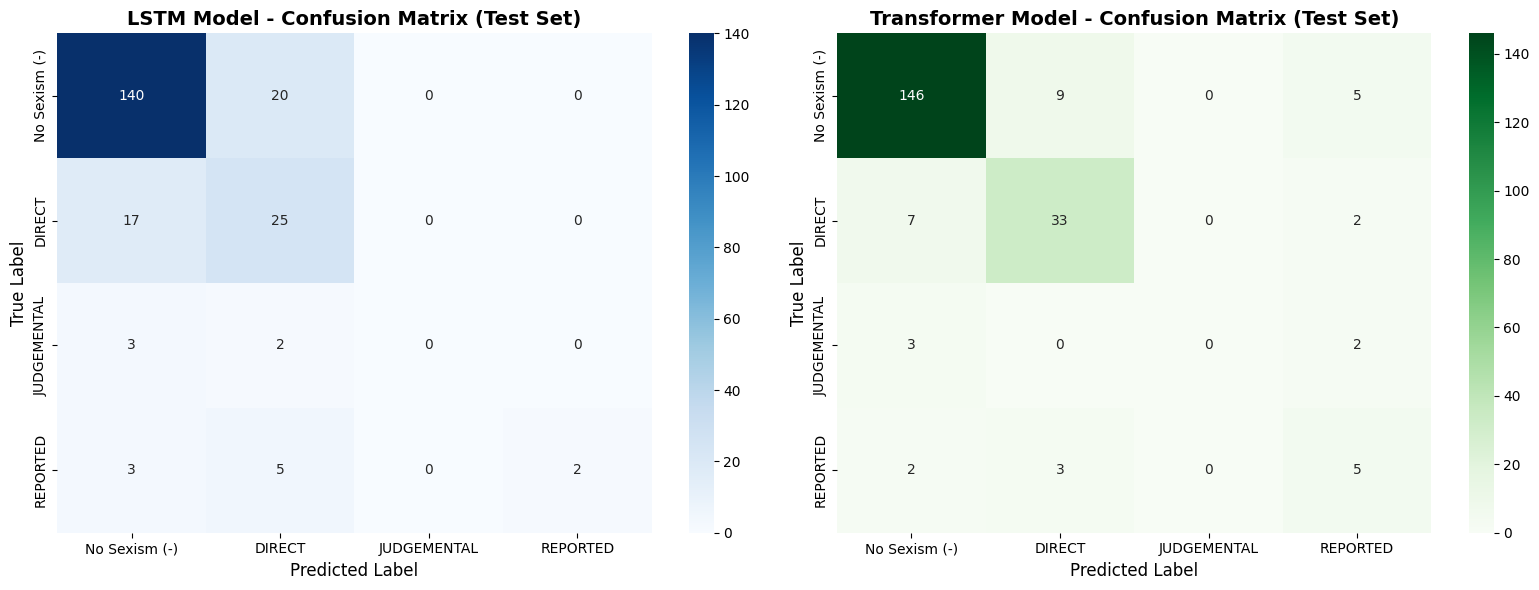

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LSTM Confusion Matrix
cm_lstm = confusion_matrix(y_true, y_lstm_pred)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=target_names, yticklabels=target_names, cbar=True)
axes[0].set_title('LSTM Model - Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Transformer Confusion Matrix
if y_transformer_pred is not None:
    cm_transformer = confusion_matrix(y_true, y_transformer_pred)
    sns.heatmap(cm_transformer, annot=True, fmt='d', cmap='Greens', ax=axes[1],
                xticklabels=target_names, yticklabels=target_names, cbar=True)
    axes[1].set_title('Transformer Model - Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('True Label', fontsize=12)
    axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

PART 4: DATA IMBALANCE ANALYSIS

In [62]:
# Class distribution in test set
y_train_labels = train_labels
print("\nTest Set Class Distribution:")
unique, counts = np.unique(y_true, return_counts=True)
total = len(y_true)
for label, count in zip(unique, counts):
    percentage = (count / total) * 100
    print(f"  {target_names[label]:20s}: {count:4d} samples ({percentage:5.2f}%)")

# Imbalance ratio
majority_class_count = counts.max()
minority_class_count = counts.min()
imbalance_ratio = majority_class_count / minority_class_count
print(f"\nImbalance Ratio (Majority/Minority): {imbalance_ratio:.2f}x")

# False Negatives (FN) for minority classes
print("\n--- False Negative Analysis (Missing Sexist Tweets) ---")
print("This shows how many actual sexist tweets are incorrectly predicted as 'No Sexism':\n")

for model_name, y_pred in [("LSTM", y_lstm_pred), ("Transformer", y_transformer_pred)]:
    if y_pred is None:
        continue
    print(f"{model_name}:")
    for sexist_class in [1, 2, 3]:  # DIRECT, JUDGEMENTAL, REPORTED
        actual_sexist = y_true == sexist_class
        predicted_non_sexist = y_pred == 0
        false_negatives = np.sum(actual_sexist & predicted_non_sexist)
        total_actual = np.sum(actual_sexist)
        fn_rate = (false_negatives / total_actual * 100) if total_actual > 0 else 0
        print(f"  {target_names[sexist_class]:20s}: {false_negatives:3d}/{total_actual:3d} FN ({fn_rate:5.2f}% of class)")
    print()


Test Set Class Distribution:
  No Sexism (-)       :  160 samples (73.73%)
  DIRECT              :   42 samples (19.35%)
  JUDGEMENTAL         :    5 samples ( 2.30%)
  REPORTED            :   10 samples ( 4.61%)

Imbalance Ratio (Majority/Minority): 32.00x

--- False Negative Analysis (Missing Sexist Tweets) ---
This shows how many actual sexist tweets are incorrectly predicted as 'No Sexism':

LSTM:
  DIRECT              :  17/ 42 FN (40.48% of class)
  JUDGEMENTAL         :   3/  5 FN (60.00% of class)
  REPORTED            :   3/ 10 FN (30.00% of class)

Transformer:
  DIRECT              :   7/ 42 FN (16.67% of class)
  JUDGEMENTAL         :   3/  5 FN (60.00% of class)
  REPORTED            :   2/ 10 FN (20.00% of class)



PART 5: Out-of-vocabulary (OOV) ANALYSIS (for LSTM)

In [63]:
# OOV rate in test set
unk_idx = vocab.get('<UNK>', 1)  # Get UNK token index

def calculate_oov_rate(sequences, unk_idx):
    """Calculates percentage of UNK tokens in sequences"""
    total_tokens = sum(len(seq) for seq in sequences)
    unk_tokens = sum(1 for seq in sequences for token_id in seq if token_id == unk_idx)
    return (unk_tokens / total_tokens * 100) if total_tokens > 0 else 0

test_oov_rate = calculate_oov_rate(test_sequences, unk_idx)
print(f"\nTests Set OOV Rate: {test_oov_rate:.2f}%")

# Misclassification analysis by OOV rate
def get_sample_oov_rate(sequence, unk_idx):
    """Gets OOV rate for a single sample"""
    if len(sequence) == 0:
        return 0
    unk_count = sum(1 for token_id in sequence if token_id == unk_idx)
    return (unk_count / len(sequence)) * 100

# Computing OOV rate per sample
test_sample_oov_rates = np.array([get_sample_oov_rate(seq, unk_idx) for seq in test_sequences])

# Classify samples by OOV content
high_oov_mask = test_sample_oov_rates > 20  # More than 20% OOV
low_oov_mask = test_sample_oov_rates <= 20

print(f"\nSamples with HIGH OOV (>20%): {np.sum(high_oov_mask)} ({np.sum(high_oov_mask)/len(test_sequences)*100:.2f}%)")
print(f"Samples with LOW OOV (≤20%):  {np.sum(low_oov_mask)} ({np.sum(low_oov_mask)/len(test_sequences)*100:.2f}%)")

# Compare LSTM accuracy on high vs low OOV samples
if np.sum(high_oov_mask) > 0:
    lstm_accuracy_high_oov = np.sum(y_lstm_pred[high_oov_mask] == y_true[high_oov_mask]) / np.sum(high_oov_mask)
    lstm_accuracy_low_oov = np.sum(y_lstm_pred[low_oov_mask] == y_true[low_oov_mask]) / np.sum(low_oov_mask)

    print(f"\nLSTM Model Accuracy:")
    print(f"  On HIGH OOV samples: {lstm_accuracy_high_oov:.4f}")
    print(f"  On LOW OOV samples:  {lstm_accuracy_low_oov:.4f}")
    print(f"  Accuracy DROP:       {lstm_accuracy_low_oov - lstm_accuracy_high_oov:+.4f}")


Tests Set OOV Rate: 2.13%

Samples with HIGH OOV (>20%): 2 (0.92%)
Samples with LOW OOV (≤20%):  215 (99.08%)

LSTM Model Accuracy:
  On HIGH OOV samples: 1.0000
  On LOW OOV samples:  0.7674
  Accuracy DROP:       -0.2326


PART 6: QUALITATIVE ERROR ANALYSIS

In [64]:
# Function to get misclassified examples
def get_error_examples(y_true, y_pred, test_df, test_sequences, error_type='fn', class_label=1, n_examples=3):
    """
    Gets misclassified examples
    error_type: 'fn' (false negatives), 'fp' (false positives), 'inter' (inter-sexist)
    """
    if error_type == 'fn':
        # False Negatives: true label is class_label, predicted as 0 (Non-sexist)
        mask = (y_true == class_label) & (y_pred == 0)
    elif error_type == 'fp':
        # False Positives: true label is 0, predicted as class_label
        mask = (y_true == 0) & (y_pred == class_label)
    elif error_type == 'inter':
        # Inter-sexist: true is one sexist class, pred is another sexist class
        mask = (y_true != 0) & (y_pred != 0) & (y_true != y_pred)

    indices = np.where(mask)[0][:n_examples]

    examples = []
    for idx in indices:
        oov_rate = get_sample_oov_rate(test_sequences[idx], unk_idx)
        examples.append({
            'index': idx,
            'tweet': test_df['tweet'].iloc[idx],
            'cleaned_tweet': test_df['cleaned_tweet'].iloc[idx],
            'true_label': target_names[y_true[idx]],
            'pred_label': target_names[y_pred[idx]],
            'oov_rate': oov_rate,
            'sequence_length': len(test_sequences[idx])
        })
    return examples

# Analyze False Negatives (missed sexist tweets)
print("\n--- FALSE NEGATIVES: Sexist tweets predicted as Non-sexist (LSTM) ---\n")
for sexist_class in [1, 2, 3]:
    class_name = target_names[sexist_class]
    examples = get_error_examples(y_true, y_lstm_pred, test_df, test_sequences,
                                  error_type='fn', class_label=sexist_class, n_examples=2)
    if examples:
        print(f"Missed {class_name} tweets (predicted as Non-sexist):")
        for ex in examples:
            print(f"  Tweet #{ex['index']}: \"{ex['cleaned_tweet'][:80]}...\"")
            print(f"    True: {ex['true_label']} | Pred: {ex['pred_label']} | OOV: {ex['oov_rate']:.1f}%")
        print()

# Analyzes False Positives (non-sexist flagged as sexist)
print("\n--- FALSE POSITIVES: Non-sexist tweets predicted as sexist (LSTM) ---\n")
examples_fp = get_error_examples(y_true, y_lstm_pred, test_df, test_sequences,
                                 error_type='fp', class_label=1, n_examples=3)
if examples_fp:
    print("Non-sexist tweets incorrectly flagged as sexist:")
    for ex in examples_fp:
        print(f"  Tweet #{ex['index']}: \"{ex['cleaned_tweet'][:80]}...\"")
        print(f"    True: {ex['true_label']} | Pred: {ex['pred_label']} | OOV: {ex['oov_rate']:.1f}%")
    print()

# Analyzes Inter-Sexist Confusion
print("\n--- INTER-SEXIST CONFUSION: Confusing sexist subtypes (LSTM) ---\n")
examples_inter = get_error_examples(y_true, y_lstm_pred, test_df, test_sequences,
                                    error_type='inter', n_examples=3)
if examples_inter:
    print("Misclassifying between sexist subtypes:")
    for ex in examples_inter:
        print(f"  Tweet #{ex['index']}: \"{ex['cleaned_tweet'][:80]}...\"")
        print(f"    True: {ex['true_label']} | Pred: {ex['pred_label']} | OOV: {ex['oov_rate']:.1f}%")
    print()


--- FALSE NEGATIVES: Sexist tweets predicted as Non-sexist (LSTM) ---

Missed DIRECT tweets (predicted as Non-sexist):
  Tweet #2: "fuck that cunt . tried to vote her out multiple time..."
    True: DIRECT | Pred: No Sexism (-) | OOV: 0.0%
  Tweet #13: "ah ! look ! gender role are back , too ! the dont believe their own lie ...."
    True: DIRECT | Pred: No Sexism (-) | OOV: 0.0%

Missed JUDGEMENTAL tweets (predicted as Non-sexist):
  Tweet #78: "going to sleep soon but im so furious about what is happening to womens right to..."
    True: JUDGEMENTAL | Pred: No Sexism (-) | OOV: 0.0%
  Tweet #84: "galaxy brain concept girl who transition so she can wear menswear in a stylish ,..."
    True: JUDGEMENTAL | Pred: No Sexism (-) | OOV: 4.0%

Missed REPORTED tweets (predicted as Non-sexist):
  Tweet #7: "kabul islamic emirate of afghanistan ha announced the end of coeducation in the ..."
    True: REPORTED | Pred: No Sexism (-) | OOV: 2.4%
  Tweet #12: "the violent antifeminism of a farrig

# Analysis
##Identified problems:
- Data imbalance: 73% of data is from No Sexism, the minority classes are judgemental and reported.
So
## Possible solutions:
- Oversampling/Augmentation (Minority Classes):

    SMOTE (Synthetic Minority Over-sampling Technique): Can be applied on the feature vectors (or embeddings) to create synthetic samples for the extremely rare classes (JUDGEMENTAL, REPORTED) to balance the training set.

    Text Augmentation: Use techniques like back-translation, word replacement (synonyms), or contextual word embeddings to generate new, diverse training examples for the minority classes.
- Use Cross-validation to ensure that each fold has representative proportion of the minority classes

- Create a weighted loss function to penalize misclassifications of the minority classes

- While the OOV impact is low we could increase the vocabulary size or use other pretrained embeddings

# [Task 8 - 0.5 points] Report

Wrap up your experiment in a short report (up to 2 pages).

### Instructions

* Use the NLP course report template.
* Summarize each task in the report following the provided template.

### Recommendations

The report is **not a copy-paste** of graphs, tables, and command outputs.

* Summarize classification performance in Table format.
* **Do not** report command outputs or screenshots.
* Report learning curves in Figure format.
* The error analysis section should summarize your findings.


# Submission

* **Submit** your report in PDF format.
* **Submit** your python notebook.
* Make sure your notebook is **well organized**, with no temporary code, commented sections, tests, etc...
* You can upload **model weights** in a cloud repository and report the link in the report.

## Bonus Points
Bonus points are arbitrarily assigned based on significant contributions such as:
- Outstanding error analysis
- Masterclass code organization
- Suitable extensions

**Note**: bonus points are only assigned if all task points are attributed (i.e., 6/6).

**Possible Suggestions for Bonus Points:**
- **Try other preprocessing strategies**: e.g., but not limited to, explore techniques tailored specifically for tweets or  methods that are common in social media text.
- **Experiment with other custom architectures or models from HuggingFace**
- **Explore Spanish tweets**: e.g., but not limited to, leverage multilingual models to process Spanish tweets and assess their performance compared to monolingual models.

# FAQ

Please check this frequently asked questions before contacting us

### Trainable Embeddings

You are **free** to define a trainable or non-trainable Embedding layer to load the GloVe embeddings.

### Model architecture

You **should not** change the architecture of a model (i.e., its layers).

However, you are **free** to play with their hyper-parameters.


### Neural Libraries

You are **free** to use any library of your choice to implement the networks (e.g., Keras, Tensorflow, PyTorch, JAX, etc...)

### Robust Evaluation

Each model is trained with at least 3 random seeds.

Task 5 requires you to compute the average performance over the 3 seeds and its corresponding standard deviation.

### Expected Results

Task 2 leaderboard reports around 40-50 F1-score.
However, note that they perform a hierarchical classification.

That said, results around 30-40 F1-score are **expected** given the task's complexity.

### Model Selection for Analysis

To carry out the error analysis you are **free** to either

* Pick examples or perform comparisons with an individual seed run model (e.g., Baseline seed 1337)
* Perform ensembling via, for instance, majority voting to obtain a single model.

### Error Analysis

Some topics for discussion include:
   * Precision/Recall curves.
   * Confusion matrices.
   * Specific misclassified samples.


# The End

Feel free to reach out for questions/doubts!